Import Libraries

In [81]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

Download the monthly stock price data of Lockheed Martin Corp from January 1, 2015, to December 31, 2019.

In [82]:
data = yf.download('LMT', start='2015-01-01', end='2019-12-31', interval='1mo')

[*********************100%%**********************]  1 of 1 completed


In [83]:
#Check the data information
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-01  192.100006  198.880005  186.800003  188.369995  148.920532   
2015-02-01  188.410004  207.059998  186.009995  200.050003  158.154449   
2015-03-01  200.050003  206.190002  195.600006  202.960007  161.638489   
2015-04-01  202.100006  202.550003  185.649994  186.600006  148.609344   
2015-05-01  186.800003  194.309998  185.910004  188.199997  149.883560   

              Volume  
Date                  
2015-01-01  26623300  
2015-02-01  26025200  
2015-03-01  27231100  
2015-04-01  28423300  
2015-05-01  21149900  


Calculate Monthly Log Returns and Annualised Return

In [87]:
# Calculate annualized return
monthly_returns = data['Log_Return'].dropna()
annualized_return = np.mean(monthly_returns) * 12  

In [88]:
def calculate_returns(ticker, start_date, end_date):
    # Calculate monthly log returns
    data['Log_Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

    # Calculate annualized return
    monthly_returns = data['Log_Return'].dropna()
    annualized_return = np.mean(monthly_returns) * 12 

    return data, monthly_returns, annualized_return

ticker = 'LMT'
start_date = '2015-01-01'
end_date = '2019-12-31'

# Calculate returns
lmt_data, lmt_monthly_returns, lmt_annualized_return = calculate_returns(ticker, start_date, end_date)

# Print the annualized return
print(f"Annualized Return for {ticker}: {lmt_annualized_return:.2%}")

Annualized Return for LMT: 17.50%


Calculate Annualised Volatility

In [15]:
def calculate_volatility(ticker, start_date, end_date):

    # Calculate monthly log returns
    data['Log_Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

    # Calculate annualized volatility
    monthly_volatility = data['Log_Return'].std()
    annualized_volatility = monthly_volatility * np.sqrt(12) 

    return data, monthly_volatility, annualized_volatility

ticker = 'LMT'
start_date = '2015-01-01'
end_date = '2019-12-31'

# Calculate monthly log returns and annualized volatility
lmt_data, lmt_monthly_volatility, lmt_annualized_volatility = calculate_volatility(ticker, start_date, end_date)

# Print the monthly and annualized volatility
print(f"Monthly Volatility for {ticker}: {lmt_monthly_volatility * 100:.4f}%")
print(f"Annualized Volatility for {ticker}: {lmt_annualized_volatility* 100:.4f}%")

Monthly Volatility for LMT: 5.3287%
Annualized Volatility for LMT: 18.4590%


Download the ESG (Total Score) data for the stock within the same timeframe. If there are any missing values for a particular month, fill them using the data from the previous month. Plot the figure and analyse what you get.

In [69]:
import yesg
ESG = yesg.get_historic_esg('LMT') 
ESG.new = pd.DataFrame.dropna(ESG)
ESG.new

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2014-09-01,69.00,71.00,67.00,69.00
2014-10-01,69.00,71.00,67.00,69.00
2014-11-01,69.00,71.00,67.00,69.00
2014-12-01,71.00,71.00,71.00,72.00
2015-01-01,72.00,72.00,71.00,74.00
...,...,...,...,...
2021-05-01,28.85,5.27,15.74,7.84
2021-09-01,28.64,5.27,15.95,7.42
2022-02-01,28.81,5.27,15.93,7.61


In [116]:
#Select the certain date from 2015/01/01 to 2019/12/31, but it doesn't work...
ESG["Date"]=ESG["Date"].values.astype('datetime64') 
import datetime
s_date = datetime.datetime.strptime('2015-01-01', '%Y-%m-%d').date()  #strat date
e_date = datetime.datetime.strptime('2019-12-31', '%Y-%m-%d').date()  #end date

KeyError: 'Date'

Text(0.5, 1.0, 'ESG Score for LMT')

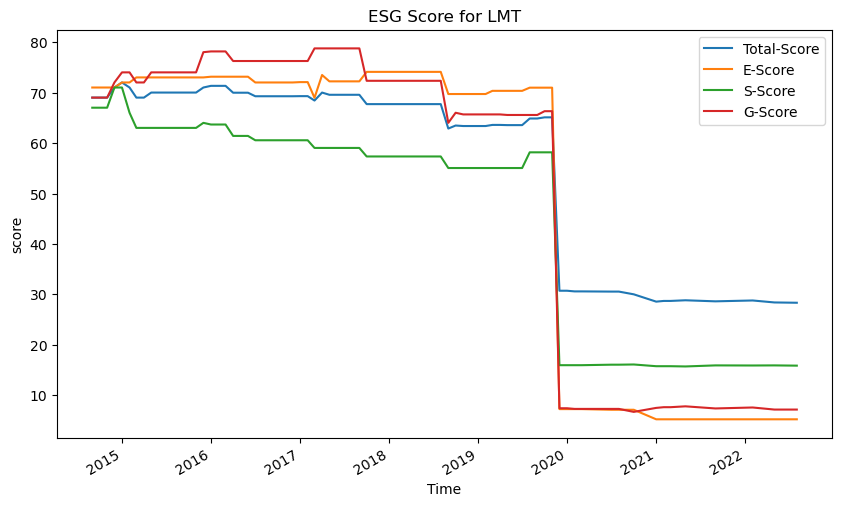

In [103]:
#Visualization
ESG.new.plot(figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('score')
plt.title('ESG Score for LMT')

Calculate and Analyse the Correlation between Stock Price and ESG

In [92]:
# Compute the correlation
correlation = data['Adj Close'].corr(ESG['Total-Score'])
# Print the correlation
print(f"The correlation between the stock price and its ESG Total Score is {correlation:.4f}")

The correlation between the stock price and its ESG Total Score is -0.5689


Caculate HDD of Taipei in February of the year 2022.

In [42]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [43]:
#Set needed data
start = datetime(2022, 2, 1)
end = datetime(2022, 2, 28)
location = Point(25.0320, 121.5654, 9)

In [44]:
data = Daily(location, start, end)
data = data.fetch()

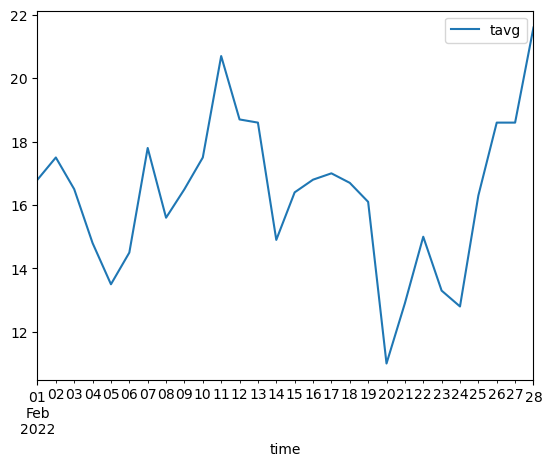

In [45]:
# Draw a plot to see the average temperature of Taipei in February 2022
data.plot(y=['tavg'])
plt.show()

In [56]:
#Calculate the HDD
data['number'] = np.arange((len(data['tavg'])))
data['tavg'].fillna(method='ffill', inplace=True) #Deal with N/A numbers
x = np.array(data['number'])
y = np.array(data['tavg'])
T_base = 18

#Compute the HDD
hdds = [max(0, T_base-temp) for temp in data.tavg]
total_hdd = sum(hdds)
print(f'Total HDD for February 2022 in Taipei: {total_hdd:.2f}')

Total HDD for February 2022 in Taipei: 55.80
